In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import harmonypy
import pymn
import scrublet as scr
import gseapy as gp
from gseapy.plot import barplot, dotplot
import bottleneck
import pyreadr
from scipy.io import mmread
import scipy
from sklearn import preprocessing
import random as rd
import scib
from matplotlib_venn import venn2,venn2_circles,venn3
from pyscenic.export import export2loom, add_scenic_metadata
from sklearn.decomposition import NMF
from sklearn import metrics
import palettable
from pyscenic.rss import regulon_specificity_scores

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
Error: package or namespace load failed for 'methods' in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/public/home/guogjgroup/ggj/anaconda3/envs/R3.6/lib/R/library/methods/libs/methods.so':
  libR.so: cannot open shared object file: No such file or directory
During startup - Warning messages:
1: package 'methods' was built under R version 3.6.3 
2: package "methods" in options("defaultPackages") was not found 
3: package 'datasets' was built under R version 3.6.3 
4: package 'grDevices' was built under R version 3.6.3 
5: package 'graphics' was built under R version 3.6.3 
6: package 'methods' was built under

In [2]:
sc.set_figure_params(dpi = 200, color_map = 'viridis_r' )
sc.settings.verbosity = 2

/public/home/guogjgroup/ggj/anaconda3/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


# CNV Cluster Display

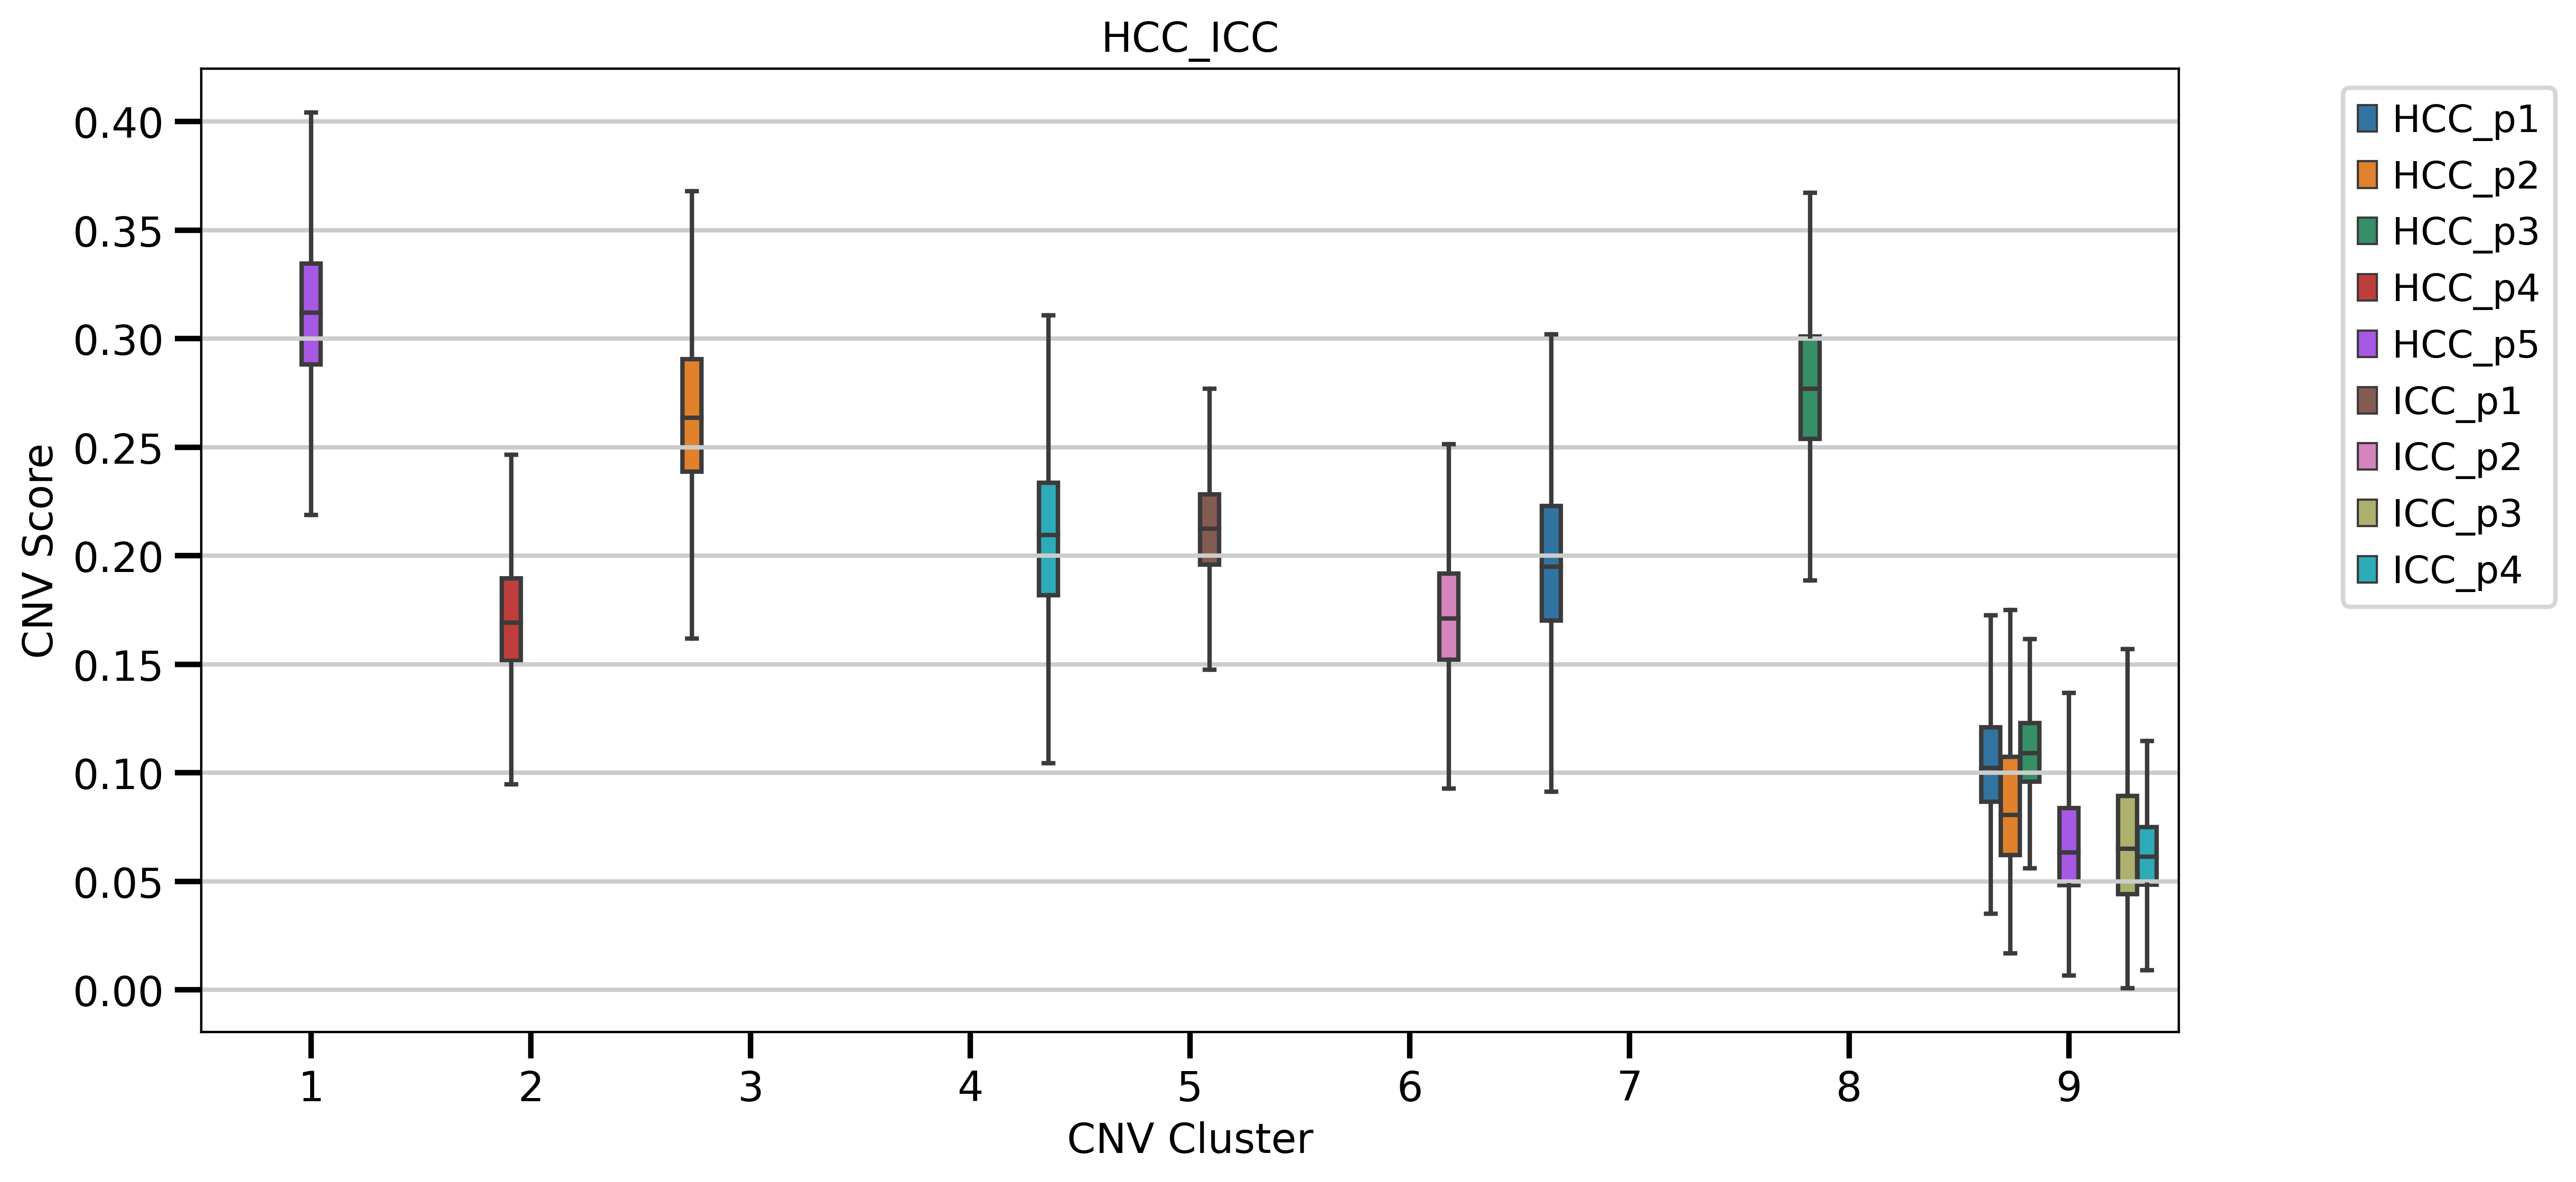

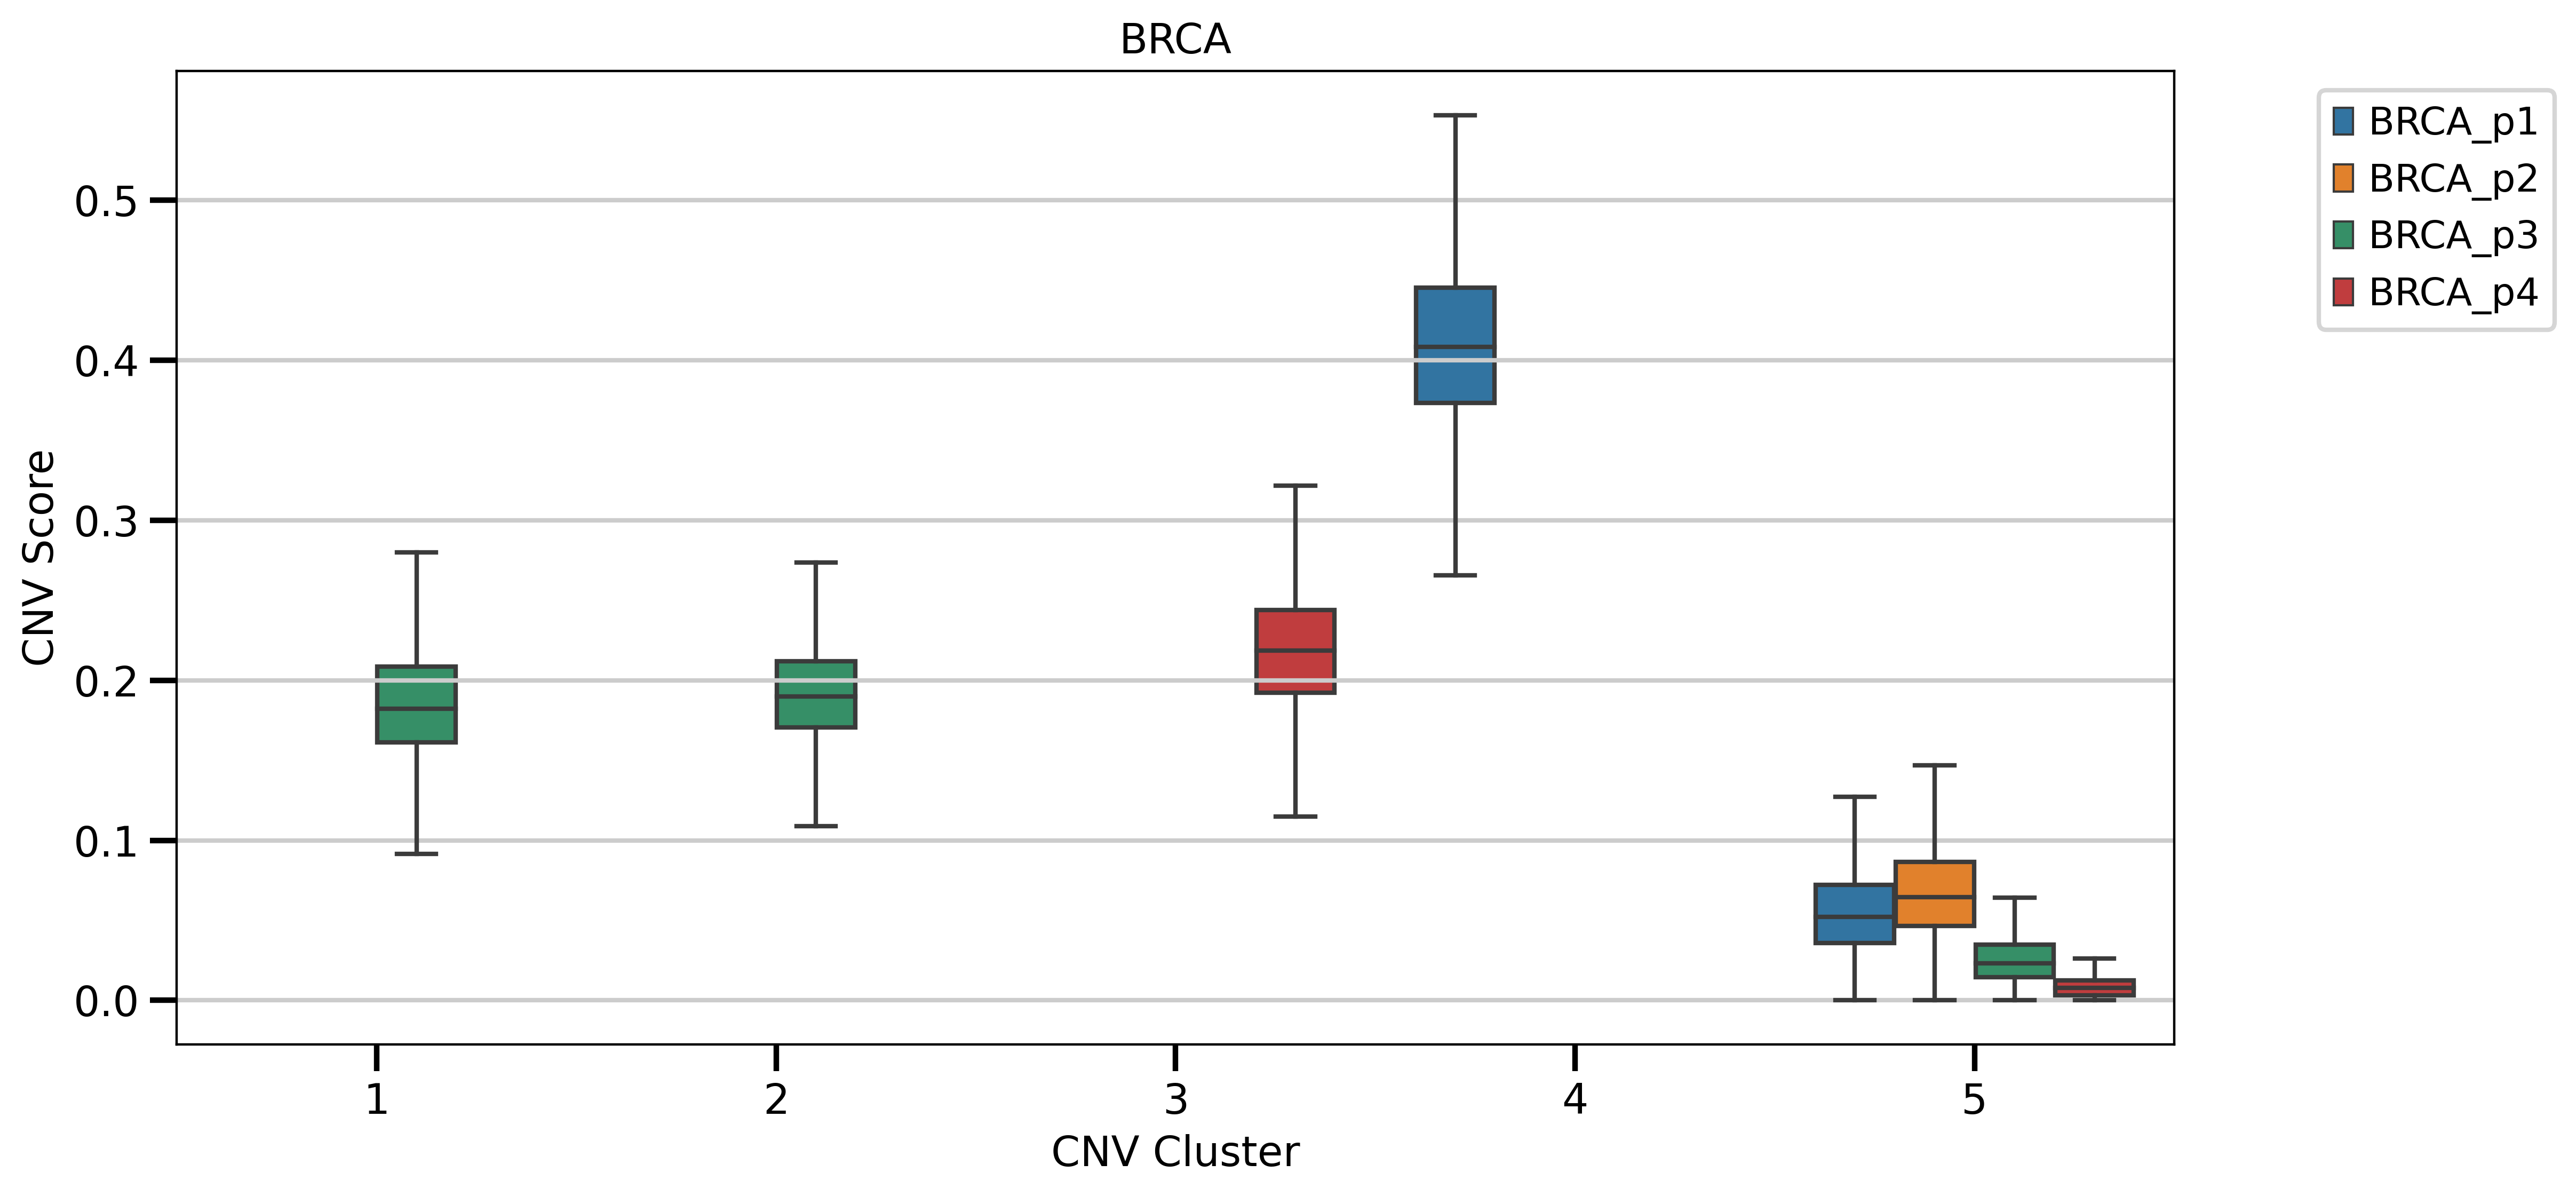

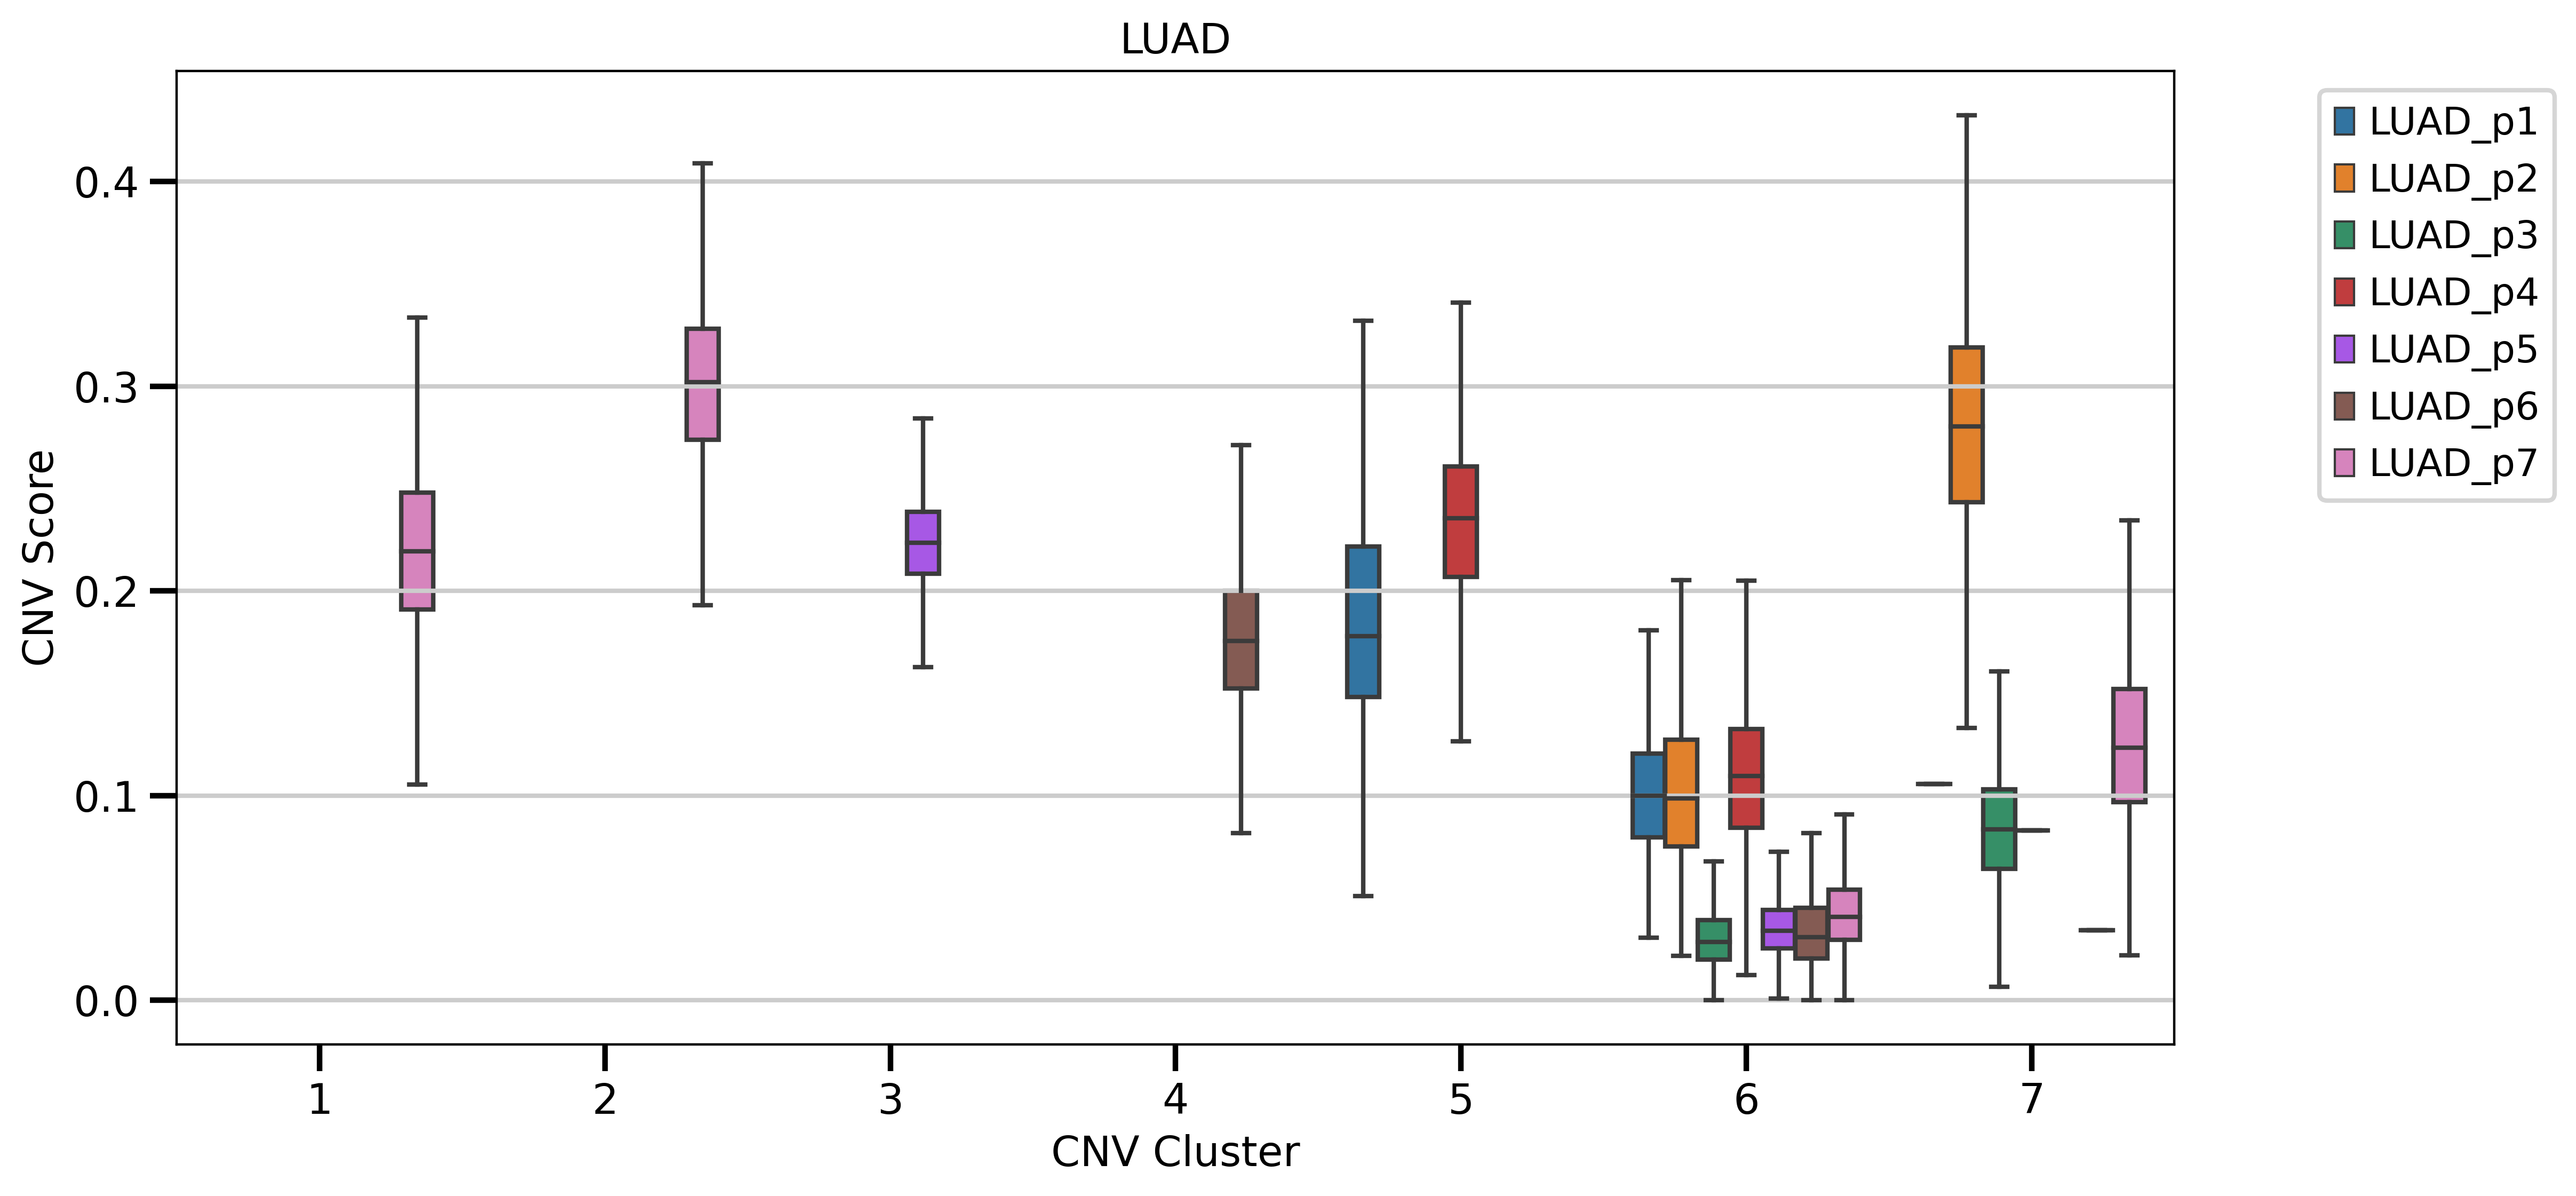

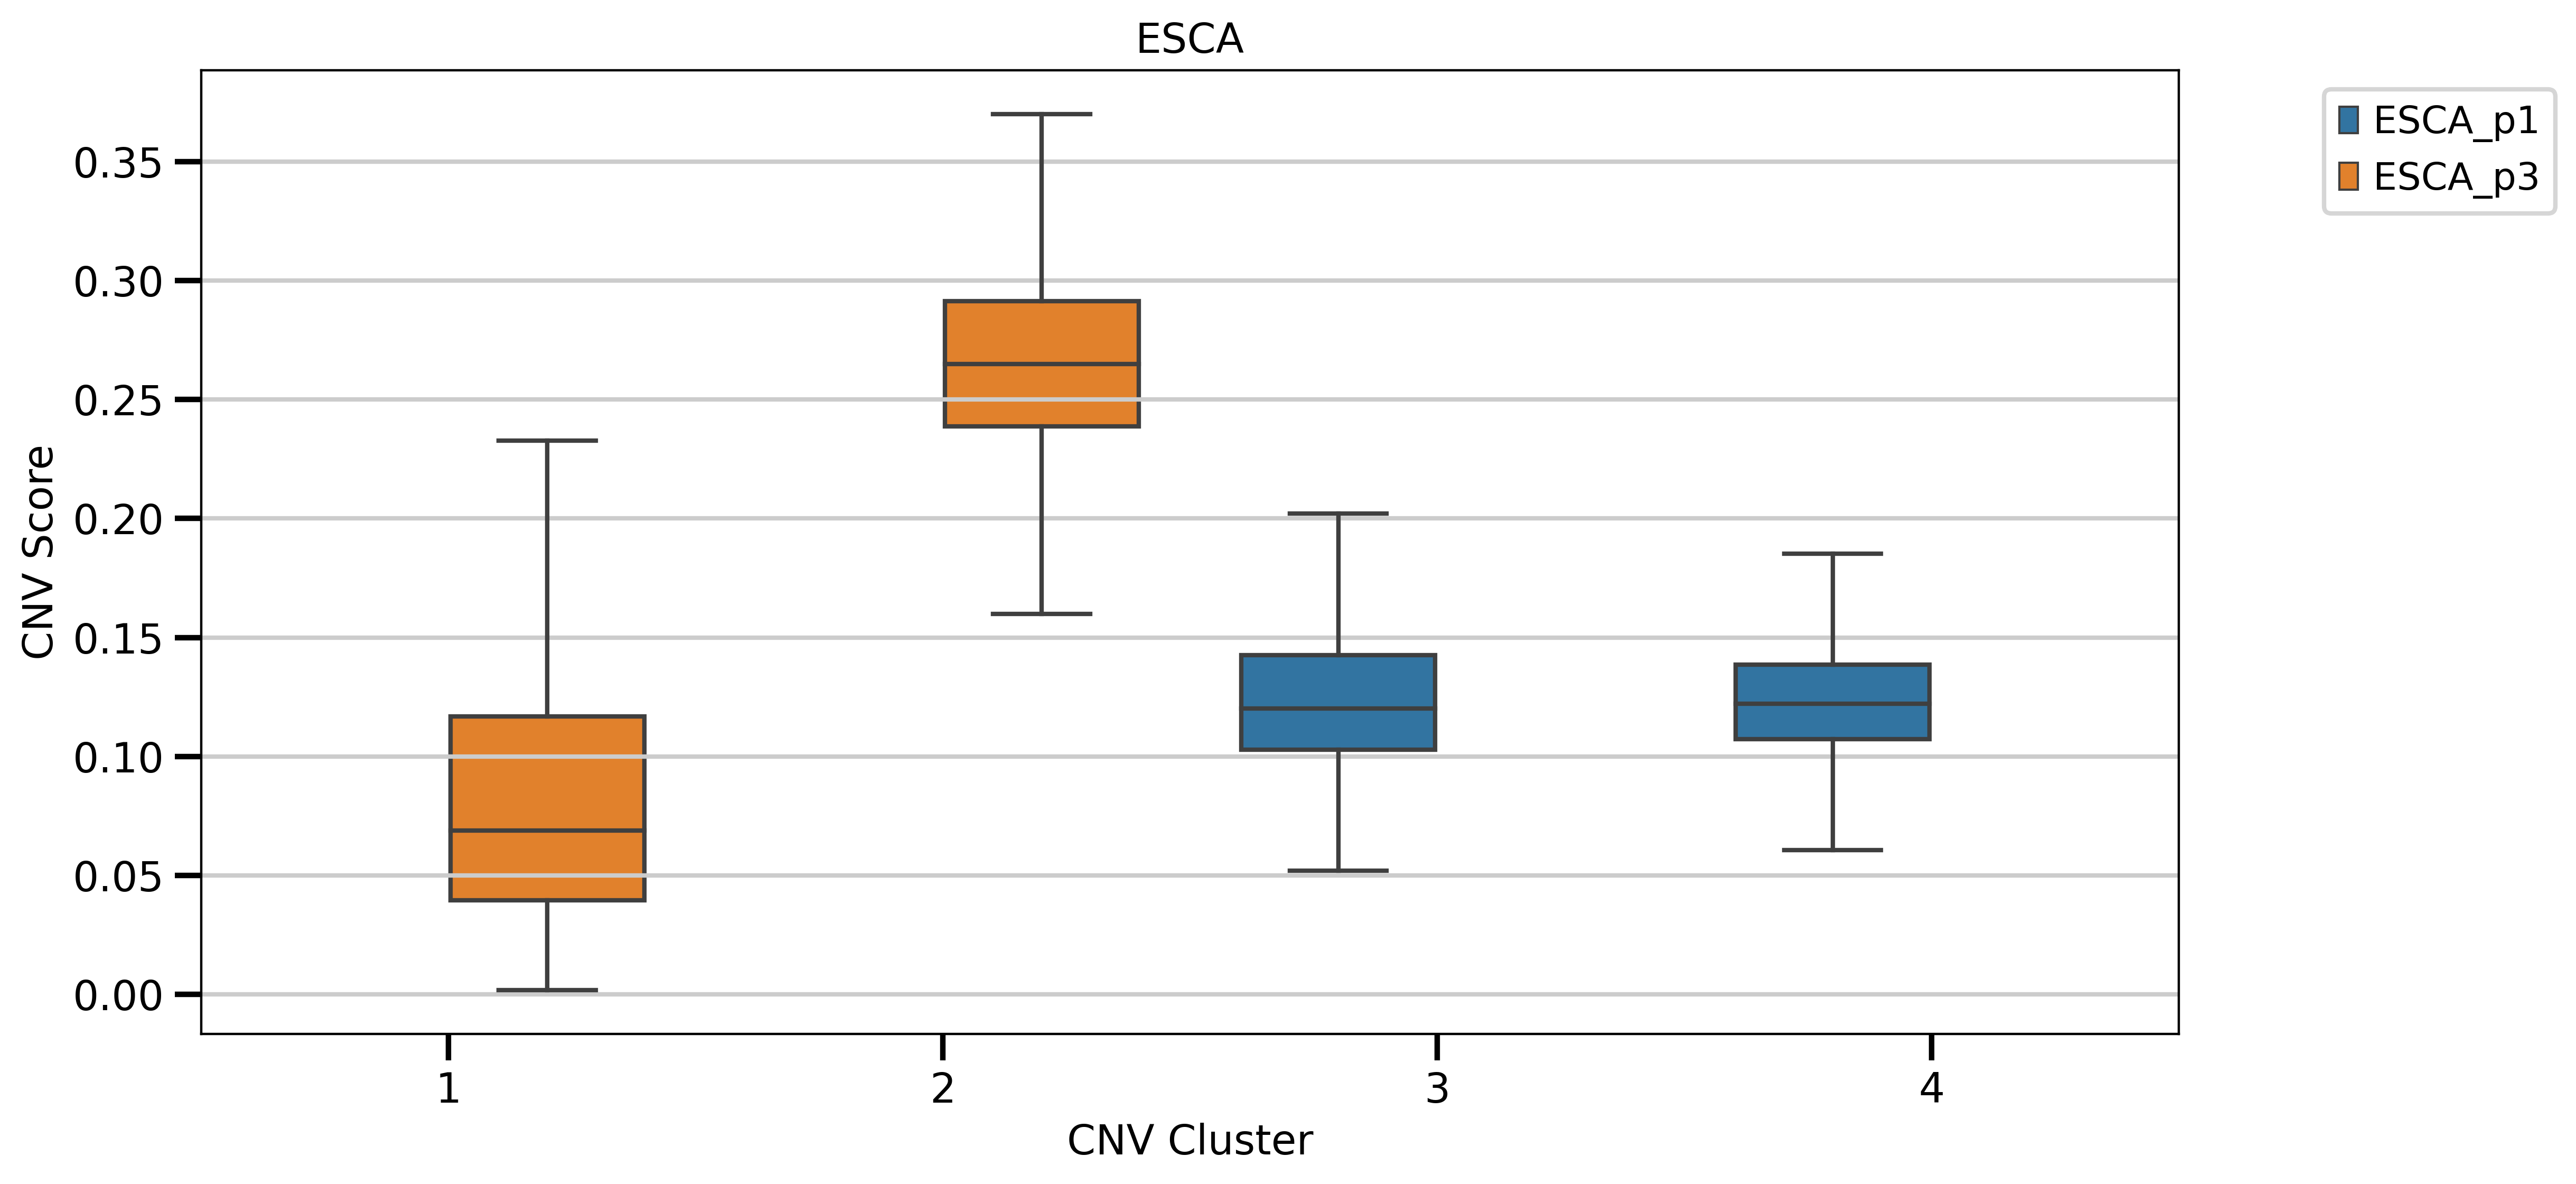

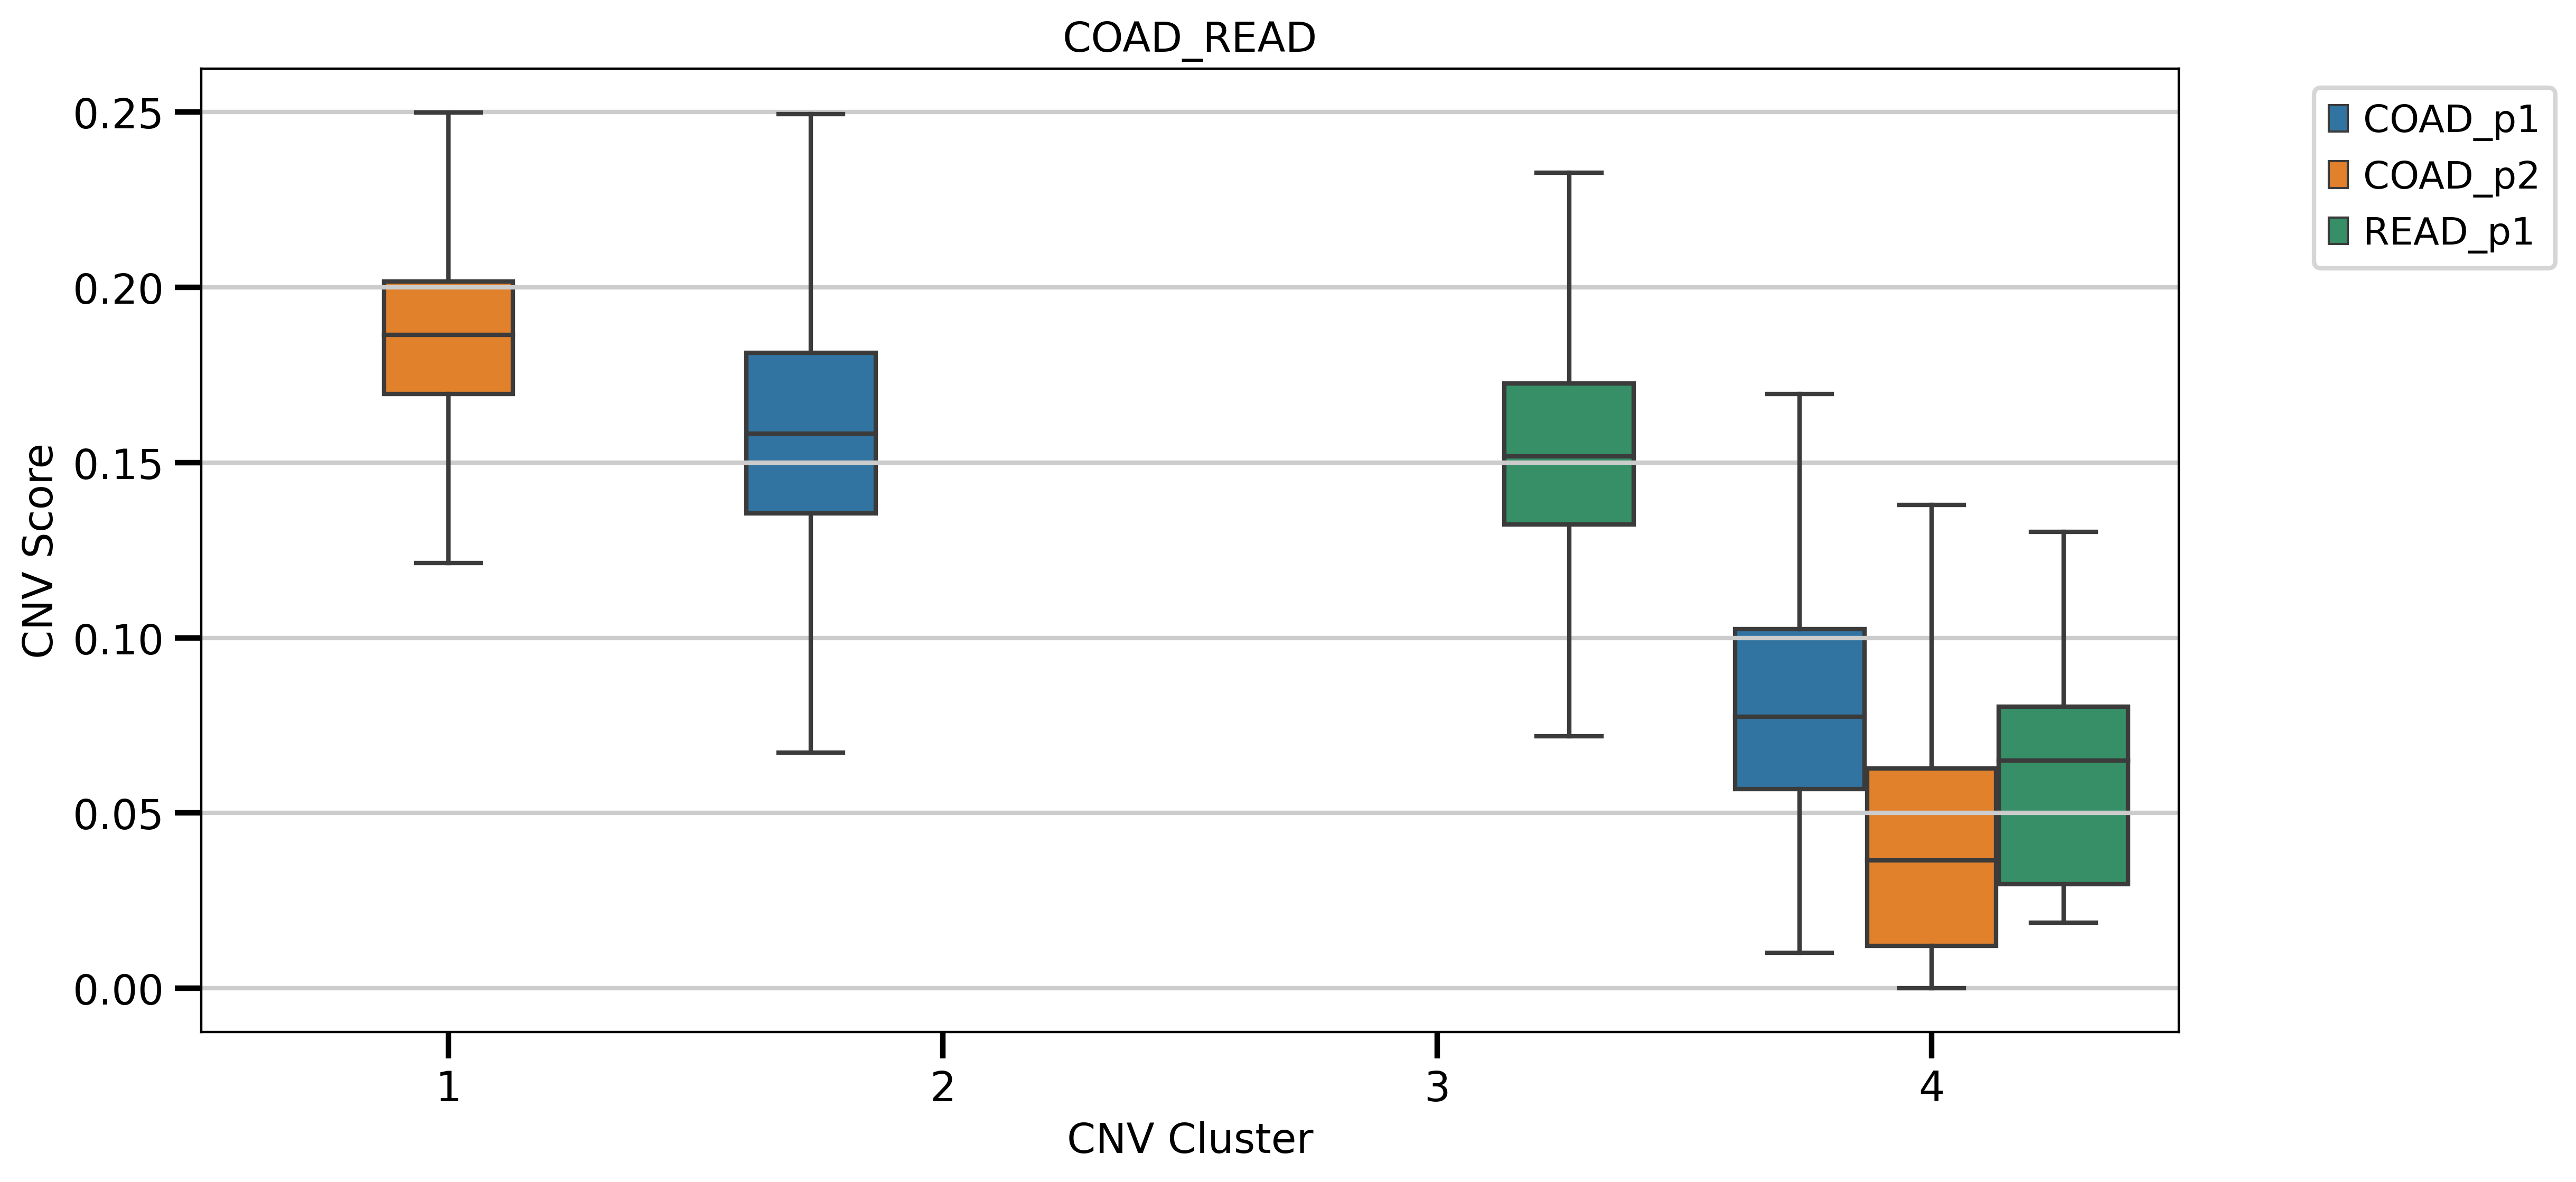

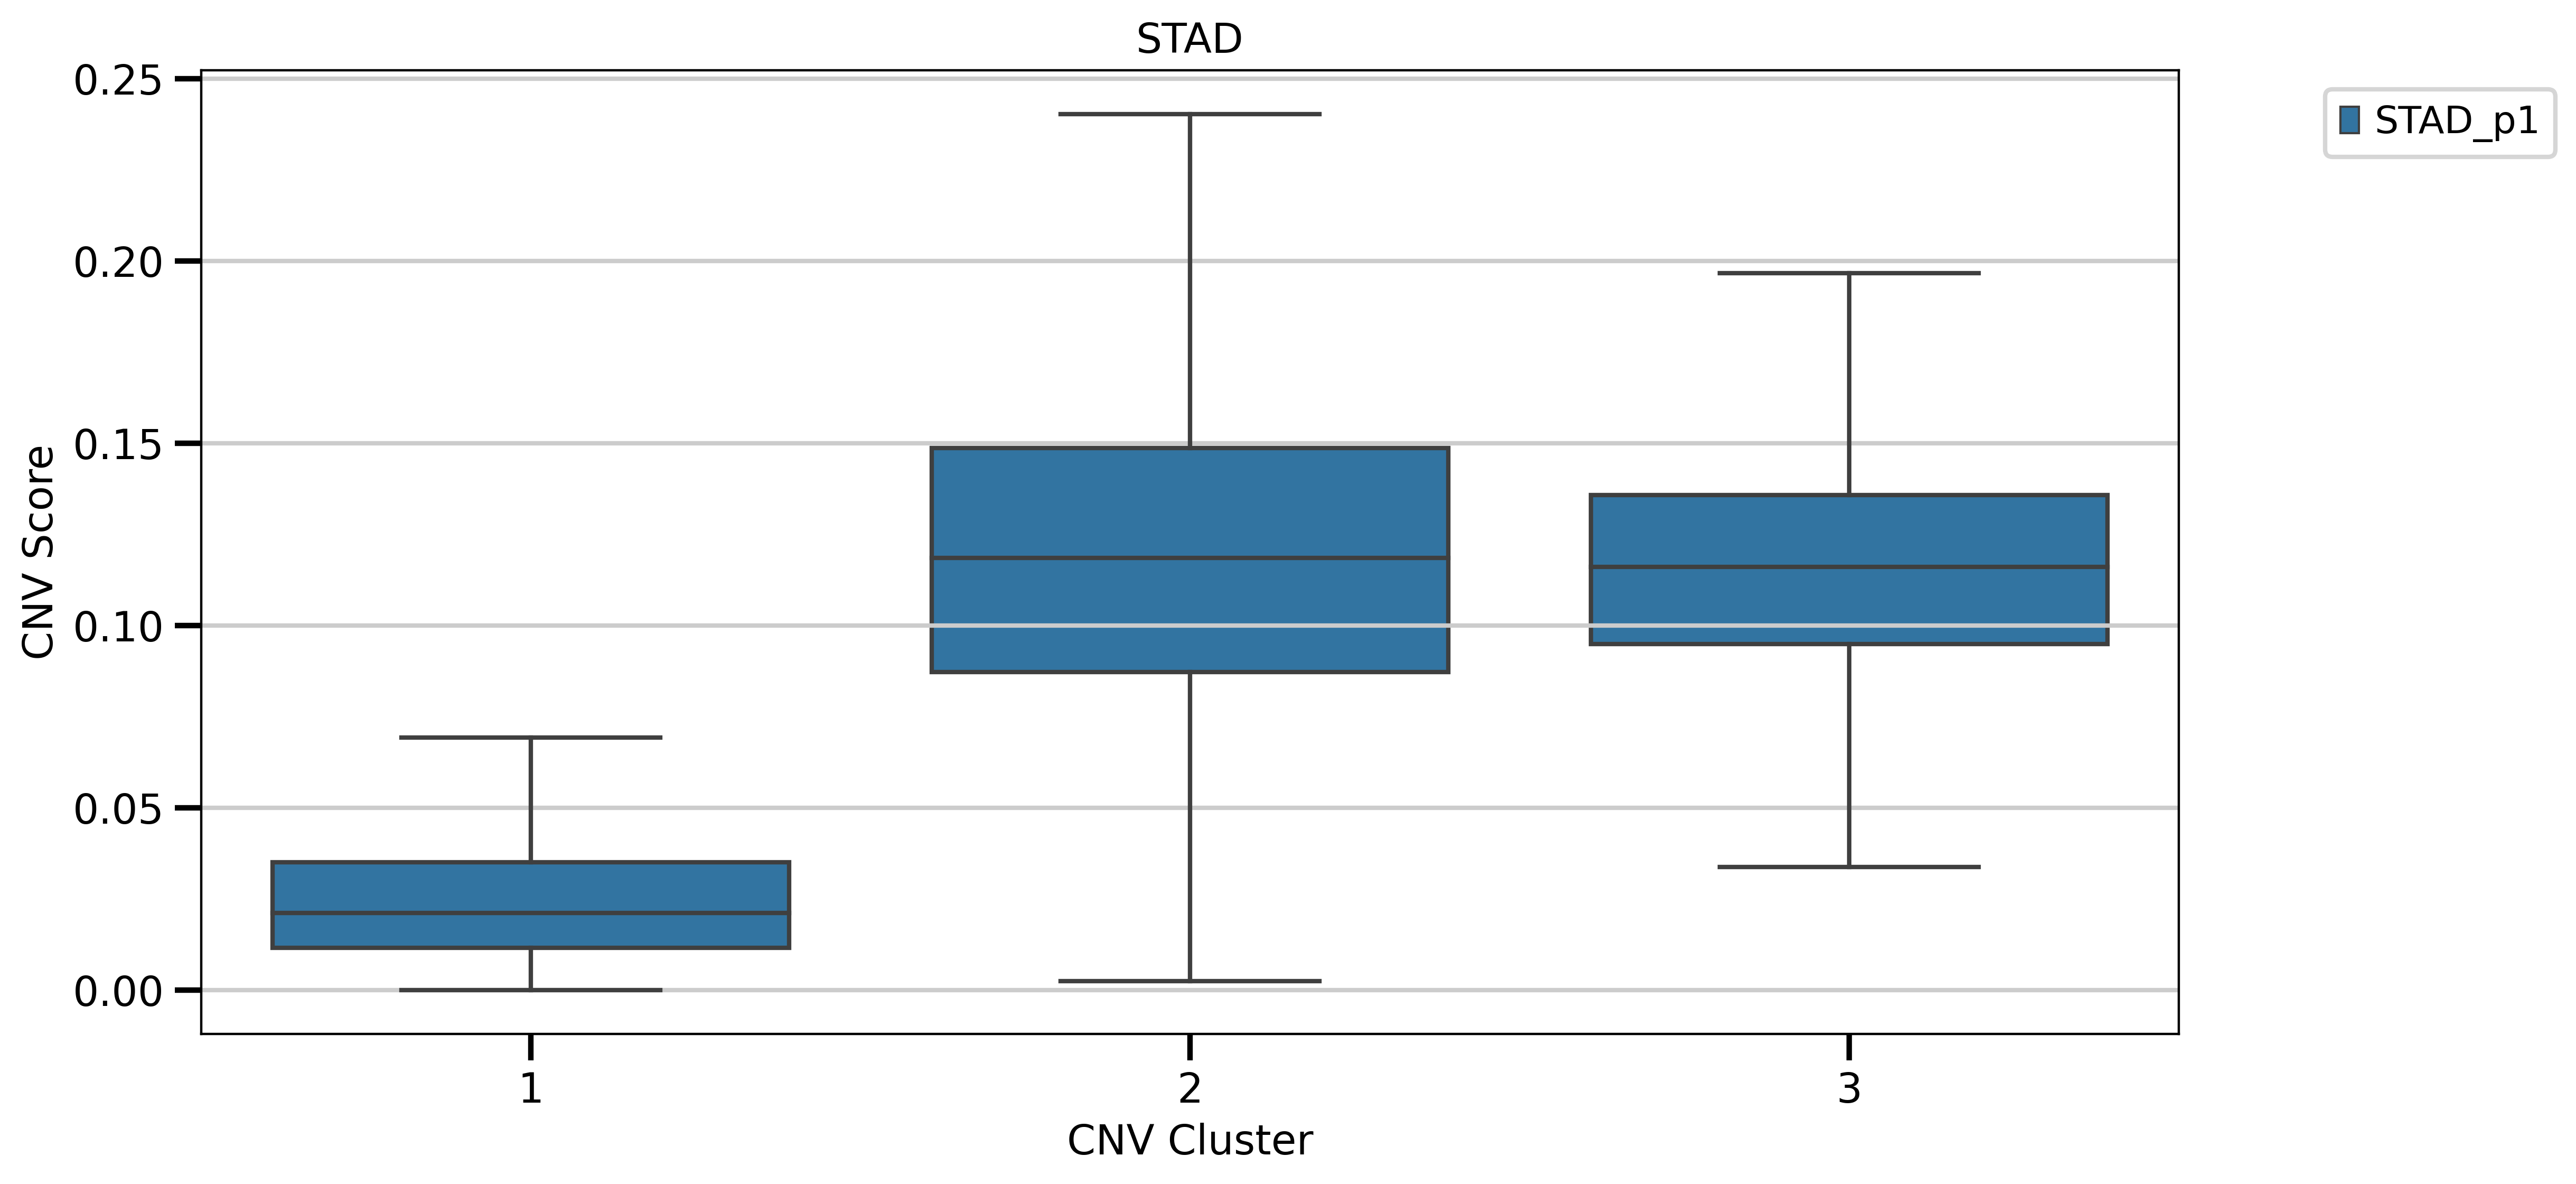

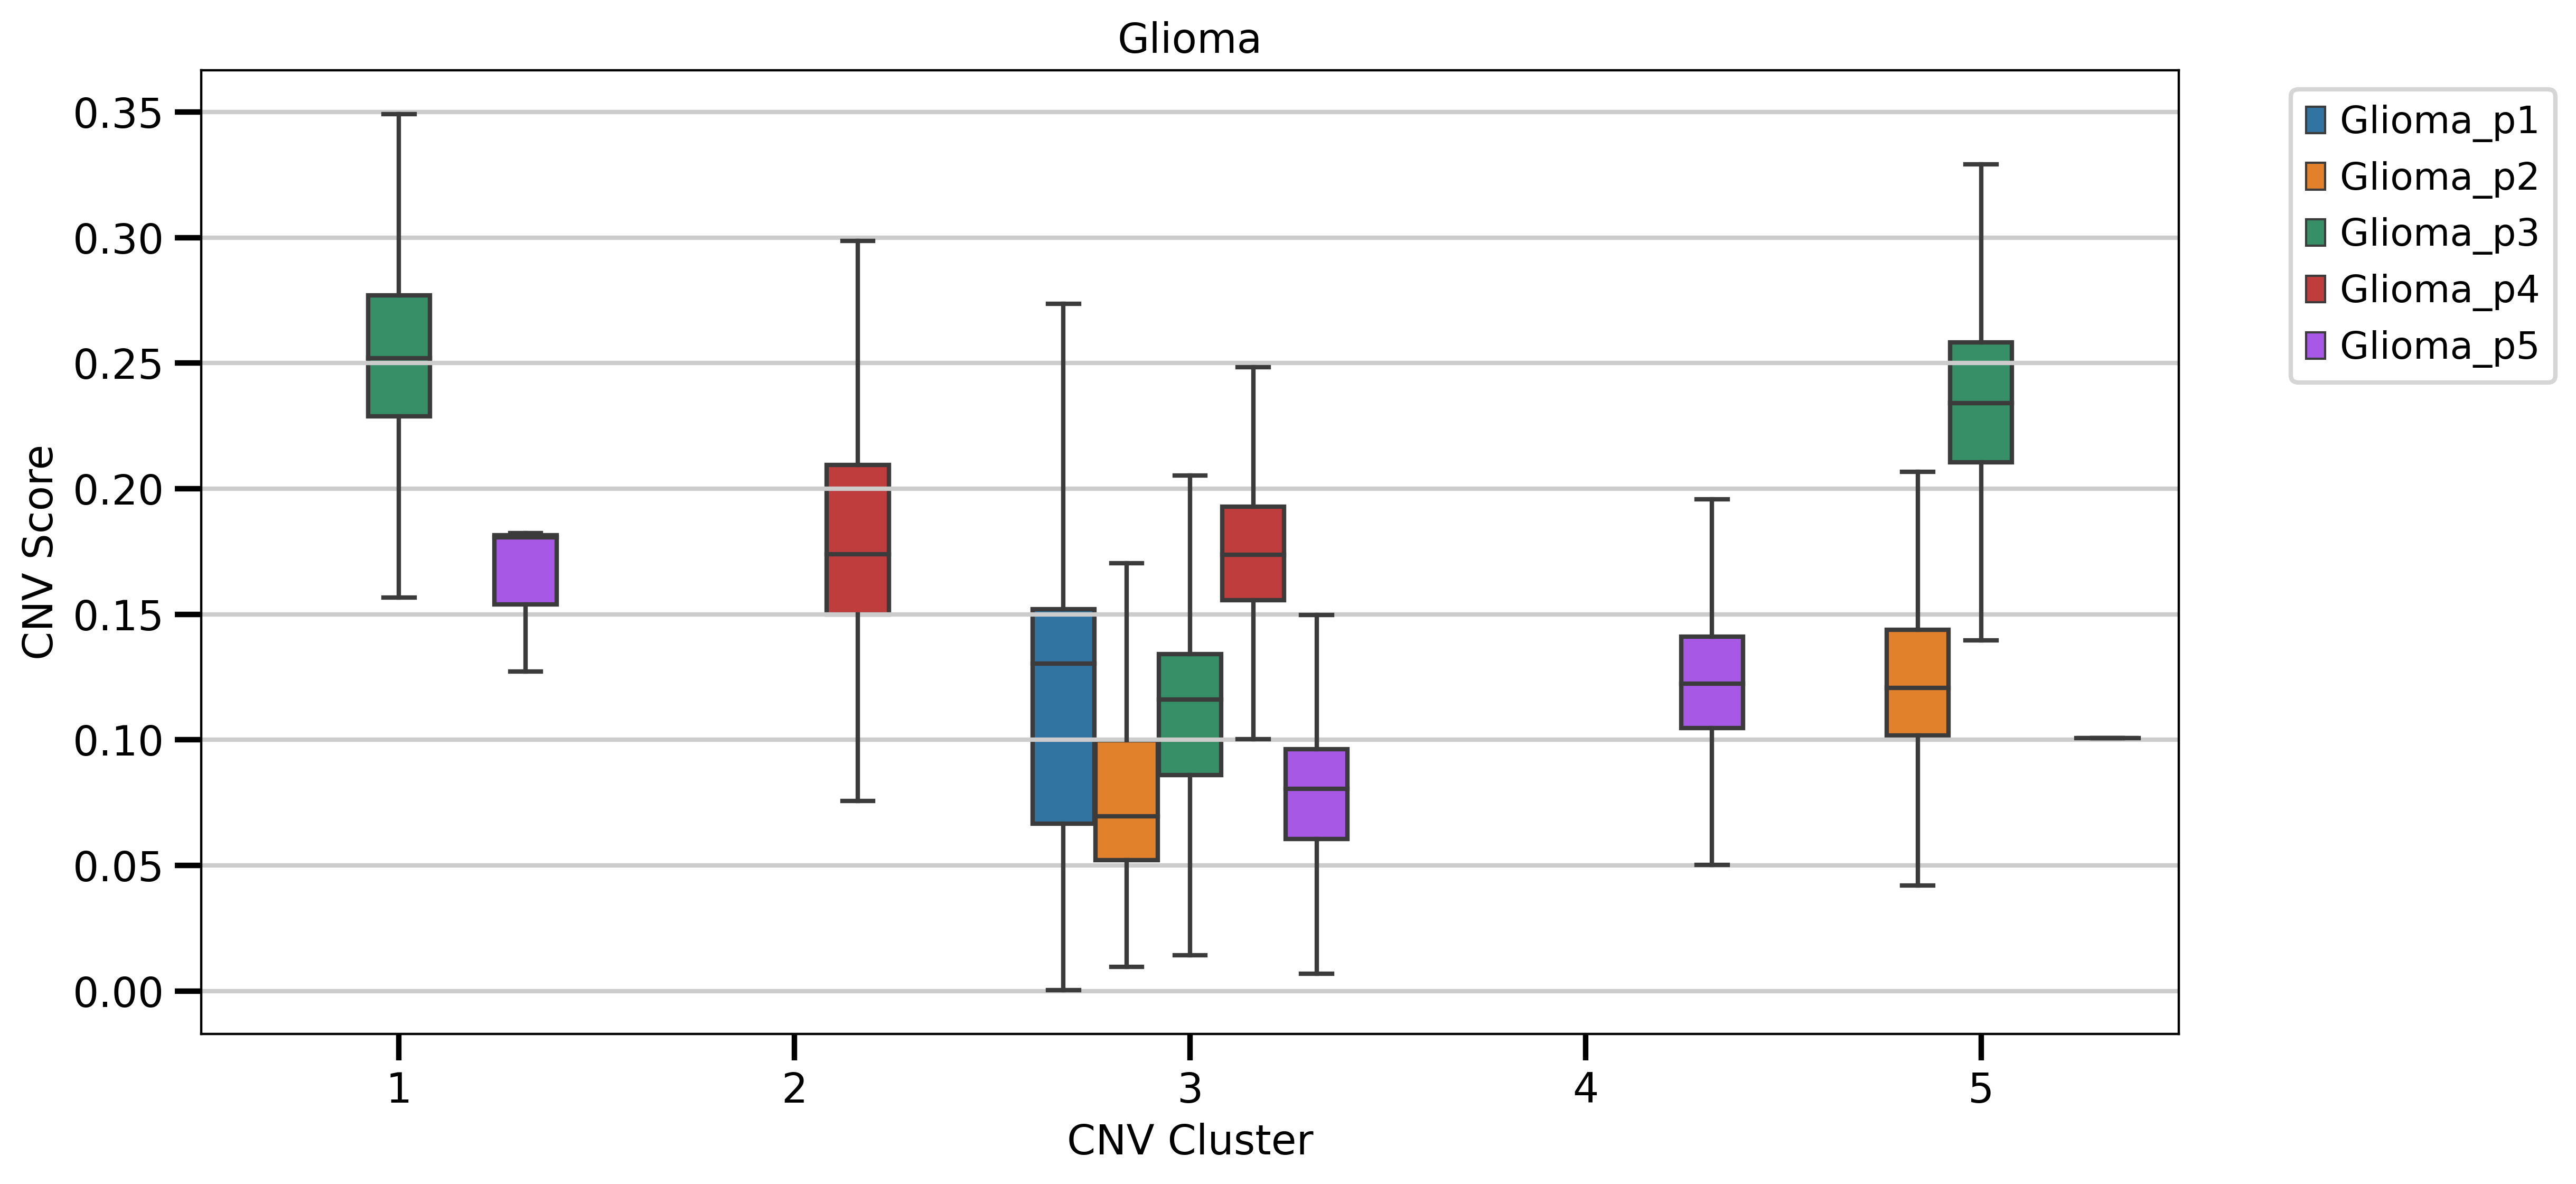

In [12]:
cnv_score_all_cell = pd.read_csv('/public/home/guogjgroup/ggj/matq_analysis/pan_cancer/all_cell/cnv_score/cnv_score_all_cell_latest.csv', index_col=0)

for cancer_type in ['HCC_ICC', 'BRCA', 'LUAD', 'ESCA', 'COAD_READ', 'STAD', 'Glioma']:
    
    cnv_cluster = pd.read_csv(cancer_type + '_all_cell_cluster_pca_used.csv', index_col=0)
    cnv_score = cnv_score_all_cell.loc[cnv_cluster.index.tolist(), :].copy()
    cnv_cluster['cnv_score'] = cnv_score['0']
    cnv_cluster['patient_id'] = cnv_score['patient_id']

    plt.figure(figsize=(12,6), dpi=200)
    sns.boxplot(data=cnv_cluster, x='cluster', y='cnv_score', hue='patient_id', showfliers = False)
    plt.title(cancer_type)
    plt.xlabel("CNV Cluster")
    plt.ylabel("CNV Score")
    plt.legend(bbox_to_anchor=(1.2, 1.0))
    plt.savefig('figures/' + cancer_type + '_cnv_cluster.pdf')
    plt.show()